In [1]:
import pandas as pd
import time

In [2]:
start_time = time.time()
d1 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2301-2306.csv')
d2 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2307-2312.csv')
d3 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2401-2405.csv')
tmp_data = pd.concat([d1, d2, d3], ignore_index=True)
print(round((time.time() - start_time)/60, 2))

C:\Users\research_01\AppData\Local\Temp\61\ipykernel_1700\1267394010.py:3: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  d2 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2307-2312.csv')


3.95


In [3]:
data = tmp_data.copy()
data.rename(columns = {'이용시간(분)' : '이용시간'}, inplace = True)
data.rename(columns = {'이동거리(M)' : '이동거리'}, inplace = True)
data = data[data.이용시간 != 0]
data = data[data.이동거리 != 0]
data = data.dropna(axis=0)
print(len(tmp_data), len(data))

55032314 37904172


In [4]:
tmp = data['대여일자'].unique()
date_list = []
weekday_to_date = {}
for i in range(len(tmp)):
    date_list.append(int(tmp[i].replace('-','')))
    if i%7 not in weekday_to_date:
        weekday_to_date[i%7] = []
    weekday_to_date[i%7].append(tmp[i])
print(len(date_list))

517


In [5]:
date_to_weekday = dict()
for weekday, dates in weekday_to_date.items():
    for date in dates:
        date_to_weekday[date] = weekday
data['요일'] = data['대여일자'].map(date_to_weekday)

In [6]:
ph_day_list = ['2023-01-01','2023-01-21','2023-01-22','2023-01-23','2023-01-24','2023-03-01','2023-05-05',
                '2023-05-27','2023-05-29','2023-06-06','2023-08-15','2023-09-28','2023-09-29','2023-09-30',
                '2023-10-02','2023-10-03','2023-10-09','2023-12-25','2024-01-01','2024-02-09','2024-02-10',
                '2024-02-11','2024-02-12','2024-03-01','2024-04-10','2024-05-05','2024-05-06','2024-05-15']

date_to_phday = dict()
for weekday, dates in weekday_to_date.items():
    if weekday == 0 or weekday == 6:
        for date in dates:
            date_to_phday[date] = 0
    else:
        for date in dates:
            if date in ph_day_list:
                date_to_phday[date] = 0
            else:
                date_to_phday[date] = 1
                
phday_to_date = dict()
for date, phday in date_to_phday.items():
    if phday not in phday_to_date:
        phday_to_date[phday] = []
    phday_to_date[phday].append(date)
    
data['공휴일'] = data['대여일자'].map(date_to_phday)

In [7]:
weekday_usage = data.groupby('공휴일').size()
print(weekday_usage)

공휴일
0    10219703
1    27684469
dtype: int64


In [8]:
print(round(weekday_usage[0]/len(phday_to_date[0]), 2), round(weekday_usage[1]/len(phday_to_date[1]), 2))

61195.83 79098.48


In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [10]:
labels = ['공휴일', '평일']
avg_use_cnt = [round(weekday_usage[0]/len(phday_to_date[0]), 2), round(weekday_usage[1]/len(phday_to_date[1]), 2)]

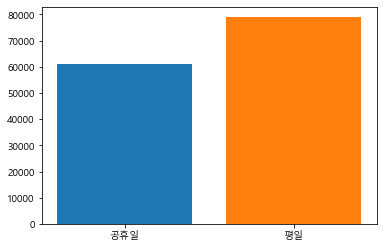

In [11]:
plt.bar(labels[0], avg_use_cnt[0])
plt.bar(labels[1], avg_use_cnt[1])
plt.show()

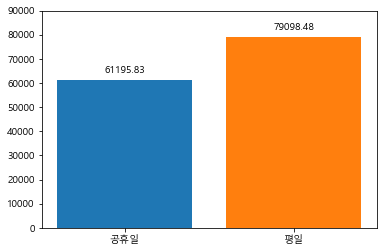

In [19]:
bar = plt.bar(labels[0], avg_use_cnt[0])
bar = plt.bar(labels[1], avg_use_cnt[1])
plt.text(labels[0], avg_use_cnt[0] + 2000, str(avg_use_cnt[0]), ha='center', va='bottom')
plt.text(labels[1], avg_use_cnt[1] + 2000, str(avg_use_cnt[1]), ha='center', va='bottom')
plt.ylim(0, 90000)

# 숫자 넣는 부분
# for rect in bar:
#     height = rect.get_height()
#     plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.show()